In [ ]:
#Linear regression with multi features from titanic dataset 

In [85]:
import pandas as pd
import numpy as np


In [86]:
#importing cleaned titanic dataset which I have cleaned in Preprocessing Notebook 
df = pd.read_csv("titanic_dataset/cleaned_train.csv")


In [87]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,False,False
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,False,True
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,False,True
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,False,True


In [88]:
# Selecting  multiple features for regression from titanic dataset

features = ["Pclass", "Age", "SibSp", "Parch"]
target = "Fare"
    

In [89]:
# checking if there is any null values
df[features].isnull().sum()


Pclass    0
Age       0
SibSp     0
Parch     0
dtype: int64

In [90]:
# Feature matrix X and target vector y
X = df[features].values        
y = df[target].values.reshape(-1, 1) 

In [91]:
#added bias in to 
X_b = np.c_[np.ones((X.shape[0], 1)), X]

In [92]:
# Computing optimal weights using the Normal Equation

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Weight vector (θ):\n", theta_best)

Weight vector (θ):
 [[108.99720117]
 [-34.30200022]
 [ -0.15521254]
 [  5.81902505]
 [ 10.25156885]]


In [93]:
# Predict on training set (just for demo)
y_train_pred = X_b.dot(theta_best)

In [94]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [95]:
#printing MSE and MAE for training data
mse_train = mse(y, y_train_pred)
mae_train = mae(y, y_train_pred)

print(f"Train MSE: {mse_train:.2f}")
print(f"Train MAE: {mae_train:.2f}")


Train MSE: 1554.58
Train MAE: 19.94


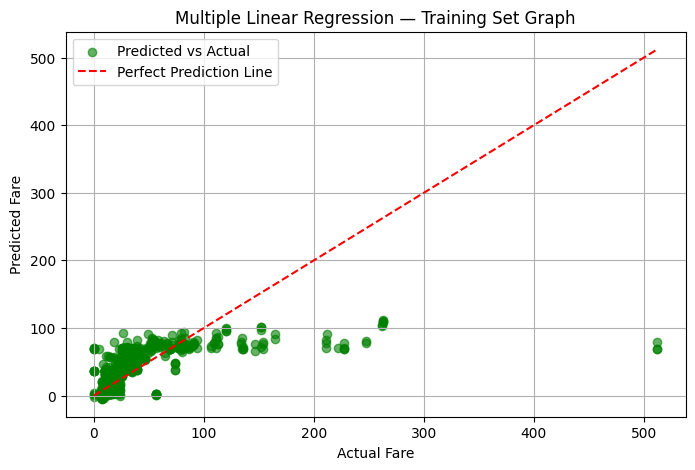

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

# Green dots: each one is (actual, predicted)
plt.scatter(y, y_train_pred, color='green', alpha=0.6, label="Predicted vs Actual")

# Red dashed line: perfect prediction line (y = ŷ)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label="Perfect Prediction Line")

plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Multiple Linear Regression — Training Set Graph")
plt.legend()
plt.grid(True)
plt.show()

In [97]:
# Load cleaned test csv file
df_test = pd.read_csv("titanic_dataset/cleaned_test.csv")

# Keep only rows with no missing values 
test_df = df_test[features + ["Fare"]].dropna()

# Actual values (target)
y_test = test_df["Fare"].values.reshape(-1, 1)

# Feature matrix with bias
X_test = test_df[features].values
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Use previously trained theta (from normal or ridge regression)
y_test_pred = X_test_b.dot(theta_best) 


In [98]:
mse_test = mse(y_test, y_test_pred)
mae_test = mae(y_test, y_test_pred)

print(f"Test MSE: {mse_test:.2f}")
print(f"Test MAE: {mae_test:.2f}")


Test MSE: 1910.98
Test MAE: 22.81


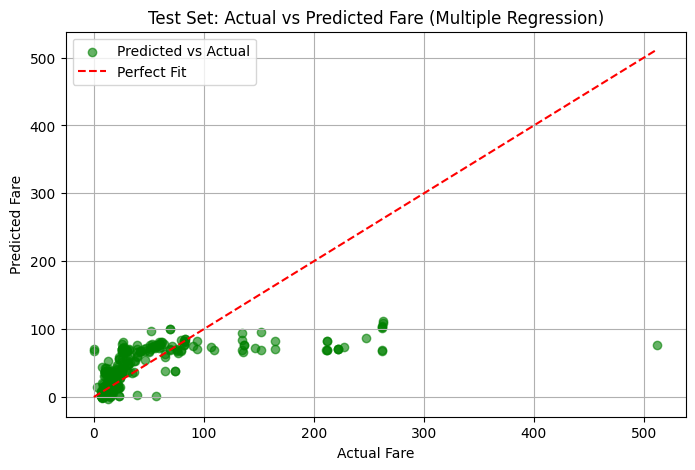

In [99]:
plt.figure(figsize=(8, 5))

# Each green dot: (actual, predicted)
plt.scatter(y_test, y_test_pred, color='green', alpha=0.6, label="Predicted vs Actual")

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Fit")

plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Test Set: Actual vs Predicted Fare (Multiple Regression)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Ridge Regression Closed-Form

In [100]:
def ridge_regression_closed_form(X_b, y, lambda_):
    n_features = X_b.shape[1]
    
    # Identity matrix (leavning bias term)
    I = np.eye(n_features)
    I[0, 0] = 0  # leaving bias term from regularize 

    # Applying Ridge closed-form formula
    theta_ridge = np.linalg.inv(X_b.T @ X_b + lambda_ * I) @ X_b.T @ y
    return theta_ridge


In [102]:
# Prepare test data
X_test = df_test[["Pclass", "Age", "SibSp", "Parch"]].dropna().values
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Predict using Ridge
y_test_pred_ridge = X_test_b @ theta_ridge


In [ ]:
#testing Ridge regulazation for diff λ value

In [107]:
for λ in [0, 0.1, 1, 10, 50, 100, 120, 130, 200, 500, 1000]:
    # Train on training set
    θ = ridge_regression_closed_form(X_b, y, λ)
    
    # Predict on test set
    pred_test = X_test_b @ θ
    
    print(f"λ={λ} | MSE: {mse(y_test, pred_test):.2f} | MAE: {mae(y_test, pred_test):.2f}")


λ=0 | MSE: 1910.98 | MAE: 22.81
λ=0.1 | MSE: 1911.00 | MAE: 22.80
λ=1 | MSE: 1911.26 | MAE: 22.78
λ=10 | MSE: 1913.98 | MAE: 22.57
λ=50 | MSE: 1929.12 | MAE: 21.73
λ=100 | MSE: 1952.80 | MAE: 20.86
λ=120 | MSE: 1963.18 | MAE: 20.55
λ=130 | MSE: 1968.49 | MAE: 20.41
λ=200 | MSE: 2007.03 | MAE: 20.20
λ=500 | MSE: 2164.13 | MAE: 21.91
λ=1000 | MSE: 2349.97 | MAE: 24.07


In [108]:
# Predict using Ridge with specific λ (e.g., 100)
theta_ridge = ridge_regression_closed_form(X_b, y, 100)
y_test_pred_ridge = X_test_b @ theta_ridge


In [106]:
# Print metrics again for consistency
print(f"Test MSE (Normal): {mse_test:.2f}")
print(f"Test MAE (Normal): {mae_test:.2f}")

Test MSE (Normal): 1910.98
Test MAE (Normal): 22.81
